In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import smogn
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
d=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")

dataset = smogn.smoter(
    
    data = d, 
    y = "WOMAC_total"
)

r_index: 100%|##########| 2/2 [00:00<00:00,  3.27it/s]


In [4]:
dataset.head(10)

,Patient ID,Data Type,Bone-Attribution,WOMAC_Pain,WOMAC_Pain Grade,WOMAC_Stiffness,WOMAC_Stiffness Grade,WOMAC_Physical function,WOMAC_MHhysical function Grade,WOMAC_total,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13491,Testing,O,13,Moderate,1,Mild,50,Severe,66,...,79.629095,23.036243,198.503249,23.969511,118.306968,79.037252,112.267381,5.412487,0.416489,5.624160
1,14069,Testing,O,9,Moderate,5,Mild,50,Severe,65,...,51.378574,30.953618,303.767840,27.348855,68.260658,339.278068,81.610060,2.372258,1.117092,2.901437
2,14060,Testing,O,9,Moderate,6,Mild,49,Severe,66,...,44.303584,138.933346,158.579374,124.639092,91.262255,74.876583,107.935260,0.641602,0.466543,0.922404
3,14445,Testing,O,14,Moderate,6,Mild,46,Severe,66,...,86.011706,99.912107,73.657538,88.535492,107.035564,53.963010,165.340371,1.118506,0.739695,1.966394
4,14467,Testing,O,14,Moderate,6,Mild,46,Severe,67,...,869.341117,242.898329,72.738615,475.871284,322.608182,13.737078,803.842123,1.294947,0.209634,1.698272
5,13252,Testing,O,10,Moderate,5,Mild,52,Severe,67,...,99.420226,93.929041,141.455636,94.338941,225.809967,25.009110,226.343160,2.382295,0.192812,2.292764
6,13349,Testing,O,13,Moderate,6,Mild,49,Severe,69,...,103.235007,126.501266,134.776550,130.002443,110.402373,113.404030,126.511877,0.921427,0.819133,1.005158
7,13367,Testing,O,13,Moderate,5,Mild,49,Severe,69,...,59.479868,288.700657,105.737608,132.314267,156.804756,75.515655,185.070411,0.538137,0.692858,1.387656
8,13515,Testing,O,13,Moderate,6,Mild,49,Severe,69,...,198.622780,81.388401,61.789312,158.739450,111.593551,24.344192,321.634106,1.392926,0.372007,2.070508
9,14126,Testing,O,12,Moderate,6,Mild,51,Severe,70,...,260.255045,223.478566,101.347967,255.191342,279.469059,33.351023,407.978548,1.215137,0.350866,1.590984


In [5]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [6]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [7]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)



featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 22 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Number Of Best Features: 20
              Specs      Score
784         TA-G-99  16.205838
785        TA-G-100  16.005257
783         TA-G-98  11.698378
776         TA-G-91  10.749696
777         TA-G-92  10.623726
778         TA-G-93  10.336521
779         TA-G-94  10.250026
782         TA-G-97   9.397983
775         TA-G-90   9.261343
780         TA-G-95   9.103972
781         TA-G-96   8.685814
774         TA-G-89   7.207755
791  Swing_CCI_TA-G   6.932854
759         TA-G-74   6.562719
758         TA-G-73   6.071908
685          TA-G-0   6.047121
773         TA-G-88   5.898644
760         TA-G-75   5.814623
686          TA-G-1   5.312280
772         TA-G-87   4.981256


In [8]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [9]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 9]

In [10]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

#Model Result Analyzing Functions

In [11]:
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns


def R2_Score(temp_y,temp_pred):
  return r2_score(temp_y,temp_pred)


def MS_error(temp_y,temp_pred):
  return mean_squared_error(temp_y, temp_pred)




def observe_plot(temp_y,temp_pred,width,height):
  plt.figure(figsize=(width,height))
  plt.scatter(temp_y, temp_pred, color = "blue")
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.show()


def pred_dataframe(temp_y,temp_pred):
  return pd.DataFrame(
        {
            "Actual Value":temp_y,
            "Predicted Value":temp_pred,
            "Difference":temp_y-temp_pred
        })




def reg_plot(pred_y_df,width,height):
  sns.set(rc={'figure.figsize':(width,height)})
  sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);





In [51]:
!pip install shap
import shap

def explain_shap(model,temp_X,max_dis):
  explainer = shap.Explainer(model.predict, temp_X)
  shap_values = explainer (temp_X)
  shap.plots.bar(shap_values,max_display=max_dis)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Linear Regression

###Model Training

In [12]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

###Training Results

In [13]:
y_pred_train = regr.predict(X_train)
print("R2 score of Training: ", R2_Score(y_train,y_pred_train))
print("Mean squared error: ",MS_error(y_train, y_pred_train))


R2 score of Training:  0.30775873401651066
Mean squared error:  318.8866597802008


In [14]:
#observe_plot(y_train,y_pred_train,width=15,height=10)

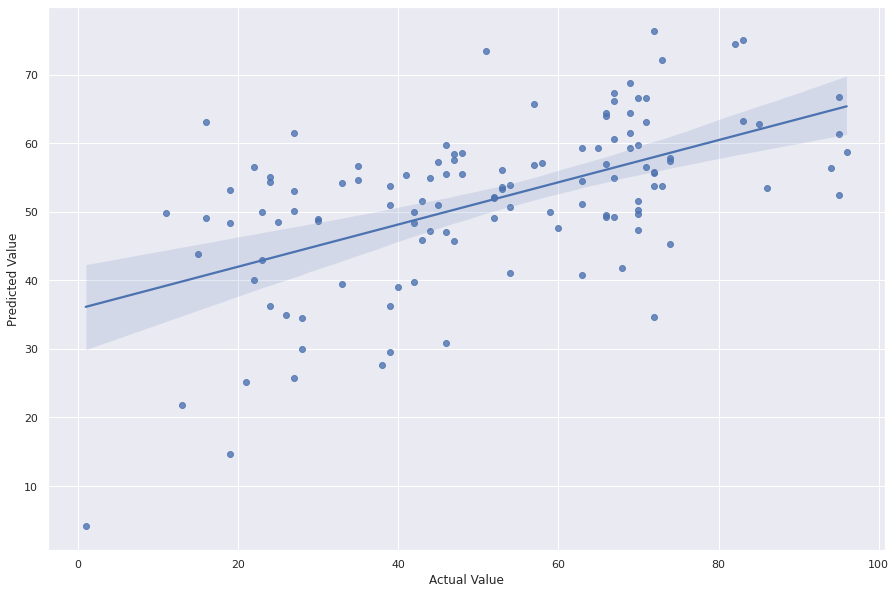

In [15]:
pred_y_df = pred_dataframe(y_train,y_pred_train)
reg_plot(pred_y_df,width=15,height=10)

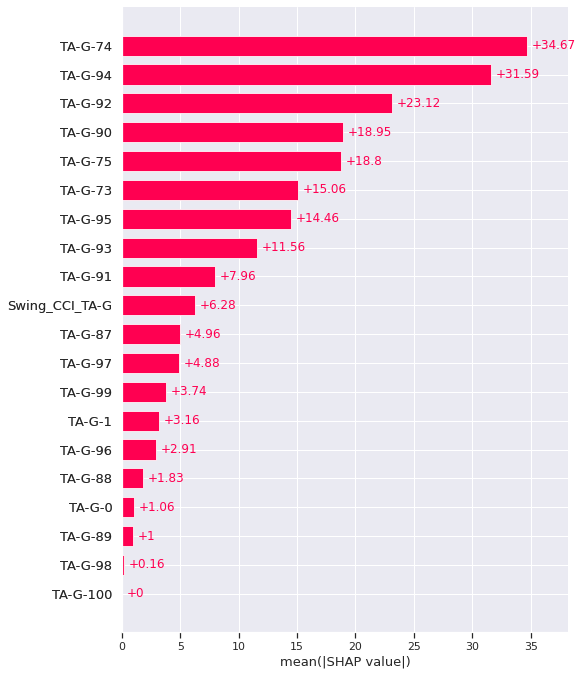

In [62]:
explain_shap(regr,X_train,20)



---



###Testing Results

In [16]:
y_pred_test = regr.predict(X_test)
print("R2 score of Testing: ", R2_Score(y_test,y_pred_test))
print("Mean squared error: ",MS_error(y_test,y_pred_test))

R2 score of Testing:  -2.0152861053852984
Mean squared error:  1551.7898534239405


In [17]:
#observe_plot(y_test,y_pred_test,width=15,height=10)

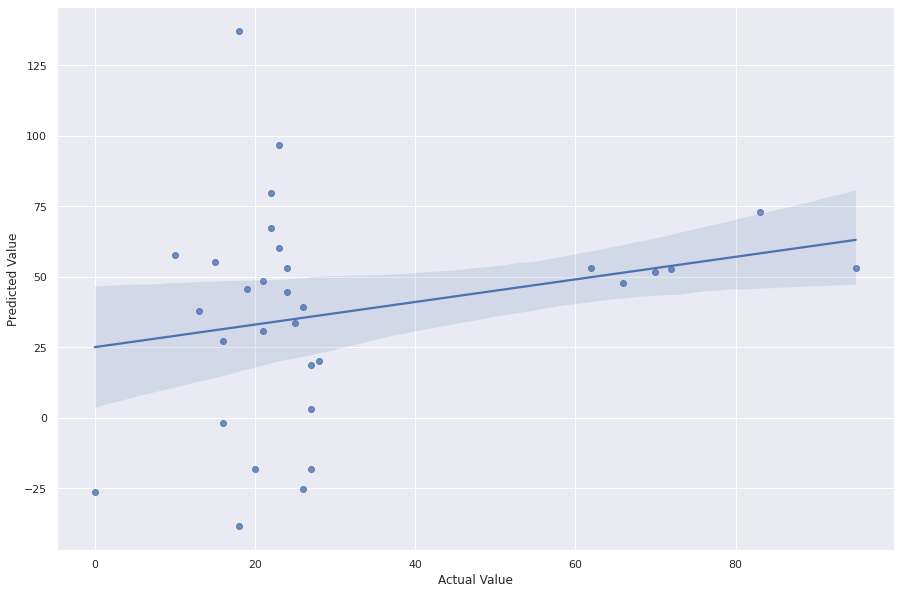

In [18]:
pred_y_df = pred_dataframe(y_test,y_pred_test)
reg_plot(pred_y_df,width=15,height=10)

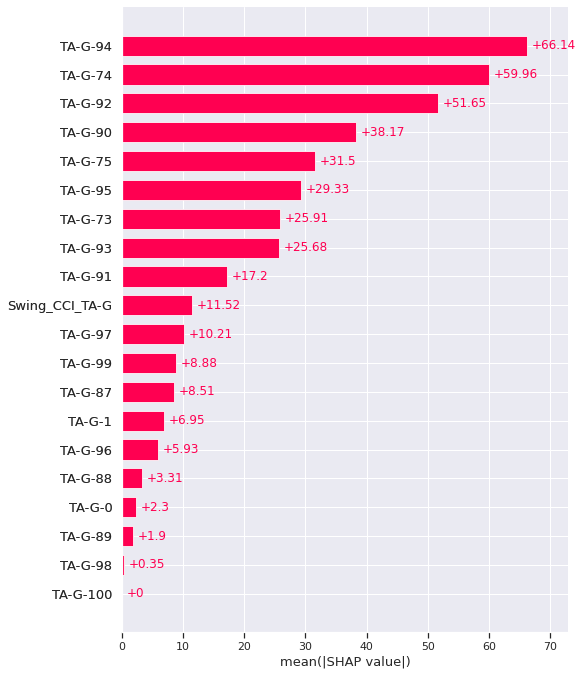

In [63]:
explain_shap(regr,X_test,20)



---



###All Data

In [19]:
y_pred_all = regr.predict(X_new)
print("R2 score of Testing: ", R2_Score(y_new,y_pred_all))
print("Mean squared error: ",MS_error(y_new,y_pred_all))

R2 score of Testing:  -0.054632466243161204
Mean squared error:  571.9992359587169


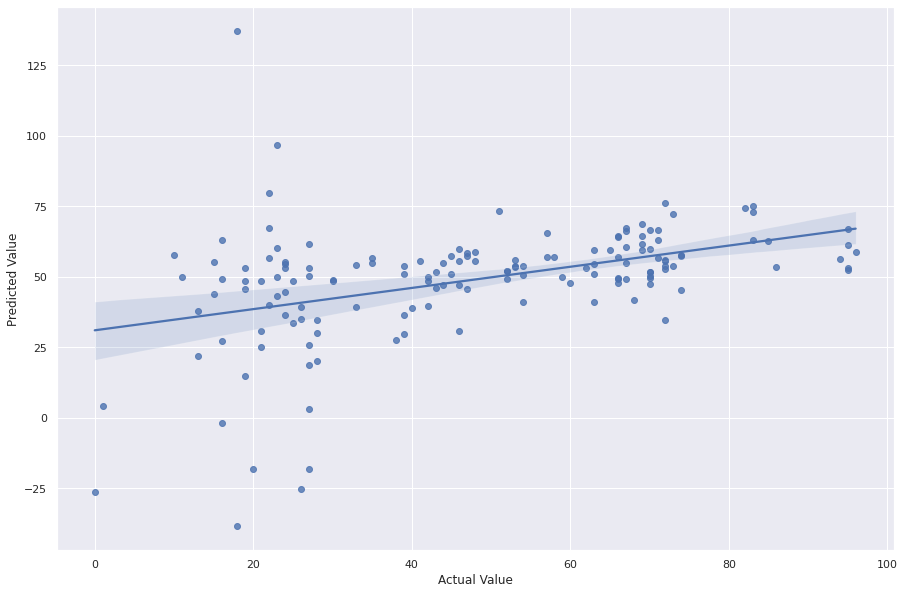

In [20]:
pred_y_df = pred_dataframe(y_new,y_pred_all)
reg_plot(pred_y_df,width=15,height=10)

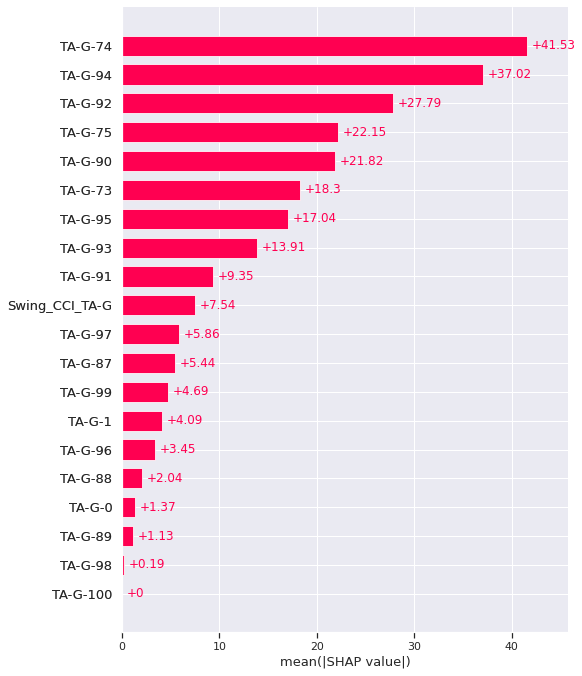

In [64]:
explain_shap(regr,X_new,20)



---



#Support Vector Regression (SVR) using linear and non-linear kernels

In [21]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

###Training Results

In [22]:
y_pred_train = regr.predict(X_train)
print("R2 score of Training: ", R2_Score(y_train,y_pred_train))
print("Mean squared error: ",MS_error(y_train, y_pred_train))


R2 score of Training:  0.056701636817655277
Mean squared error:  434.5381863128095


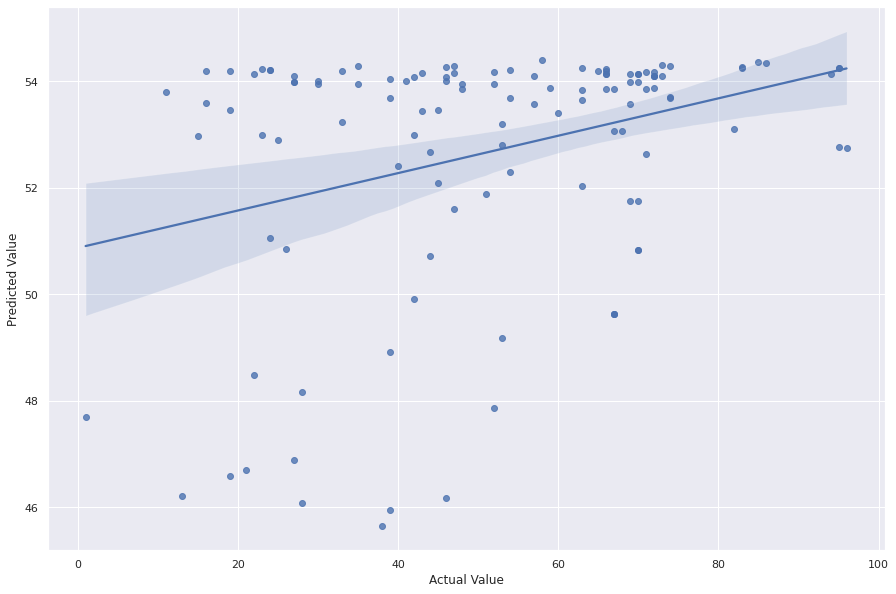

In [23]:
pred_y_df = pred_dataframe(y_train,y_pred_train)
reg_plot(pred_y_df,width=15,height=10)

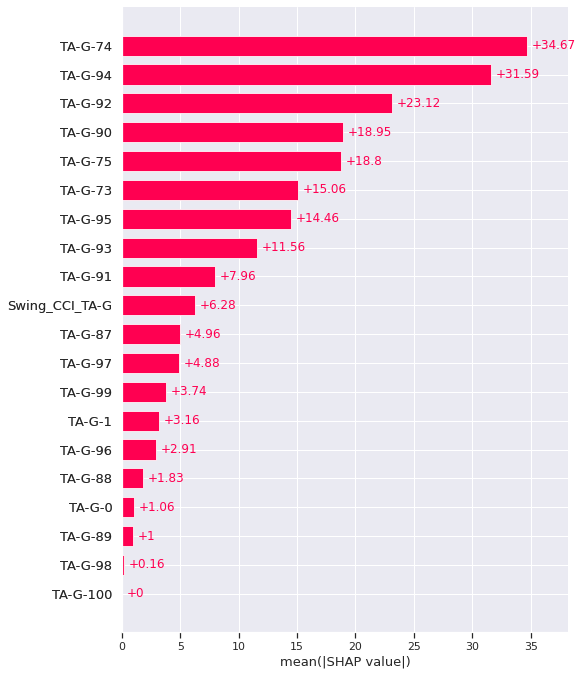

In [59]:
explain_shap(regr,X_train,20)



---



###Testing Results

In [24]:
y_pred_test = regr.predict(X_test)
print("R2 score of Testing: ", R2_Score(y_test,y_pred_test))
print("Mean squared error: ",MS_error(y_test,y_pred_test))

R2 score of Testing:  -0.787760384037965
Mean squared error:  920.0547899413696


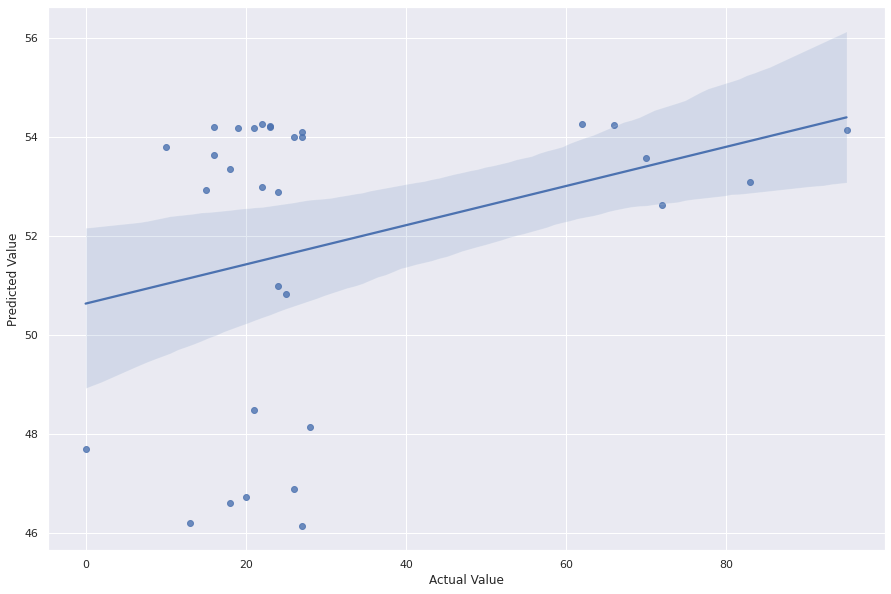

In [25]:
pred_y_df = pred_dataframe(y_test,y_pred_test)
reg_plot(pred_y_df,width=15,height=10)

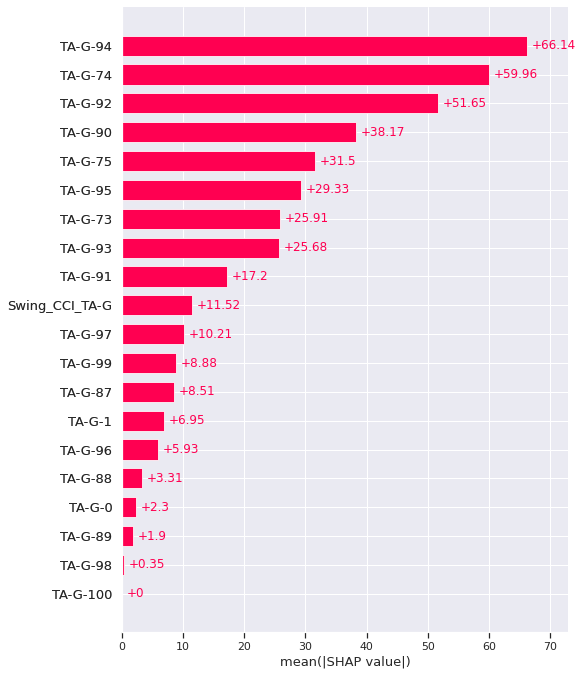

In [60]:
explain_shap(regr,X_test,20)



---



###All Data

In [26]:
y_pred_all = regr.predict(X_new)
print("R2 score of Testing: ", R2_Score(y_new,y_pred_all))
print("Mean squared error: ",MS_error(y_new,y_pred_all))

R2 score of Testing:  0.015035053644458563
Mean squared error:  534.2137804352291


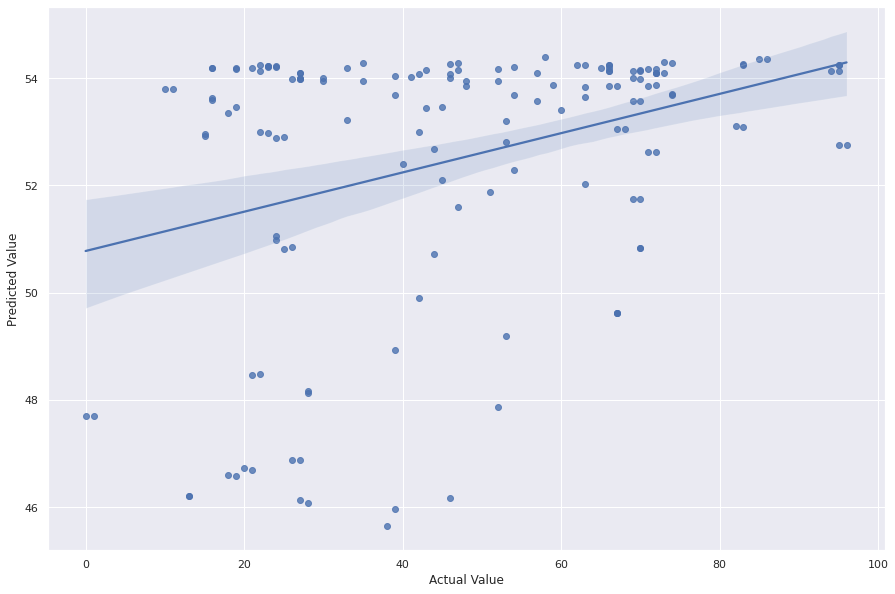

In [27]:
pred_y_df = pred_dataframe(y_new,y_pred_all)
reg_plot(pred_y_df,width=15,height=10)

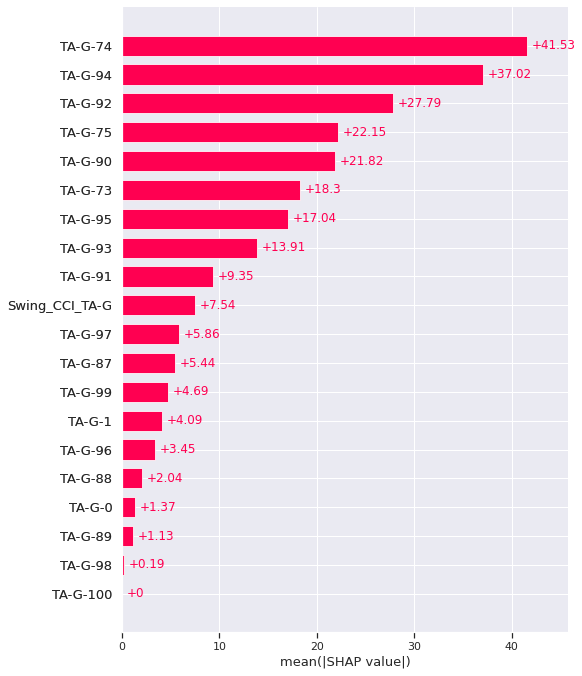

In [61]:
explain_shap(regr,X_new,20)



---



#RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=0)

###Training Results

In [29]:
y_pred_train = regr.predict(X_train)
print("R2 score of Training: ", R2_Score(y_train,y_pred_train))
print("Mean squared error: ",MS_error(y_train, y_pred_train))


R2 score of Training:  0.3264208772003181
Mean squared error:  310.2897893007022


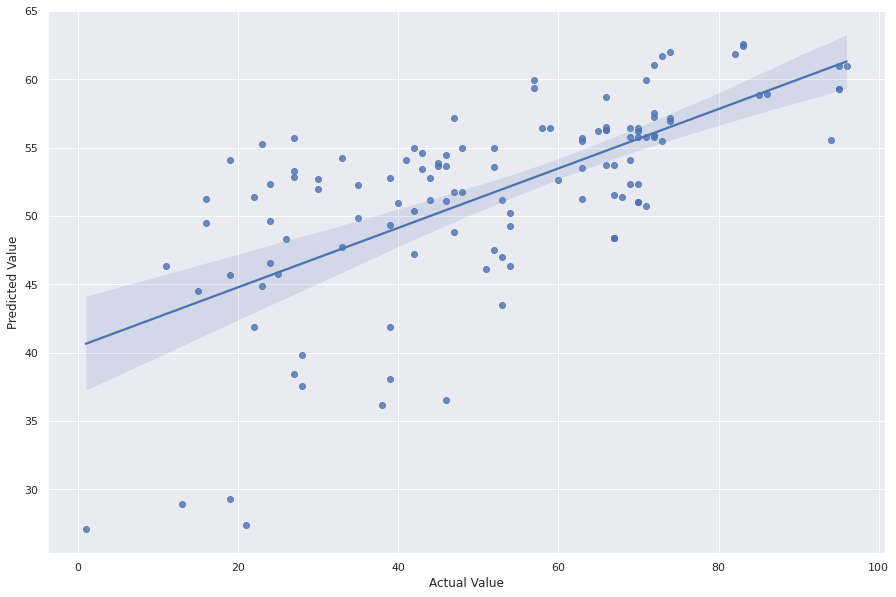

In [30]:
pred_y_df = pred_dataframe(y_train,y_pred_train)
reg_plot(pred_y_df,width=15,height=10)



---



###Testing Results

In [31]:
y_pred_test = regr.predict(X_test)
print("R2 score of Testing: ", R2_Score(y_test,y_pred_test))
print("Mean squared error: ",MS_error(y_test,y_pred_test))

R2 score of Testing:  -0.276582600273219
Mean squared error:  656.9817446588198


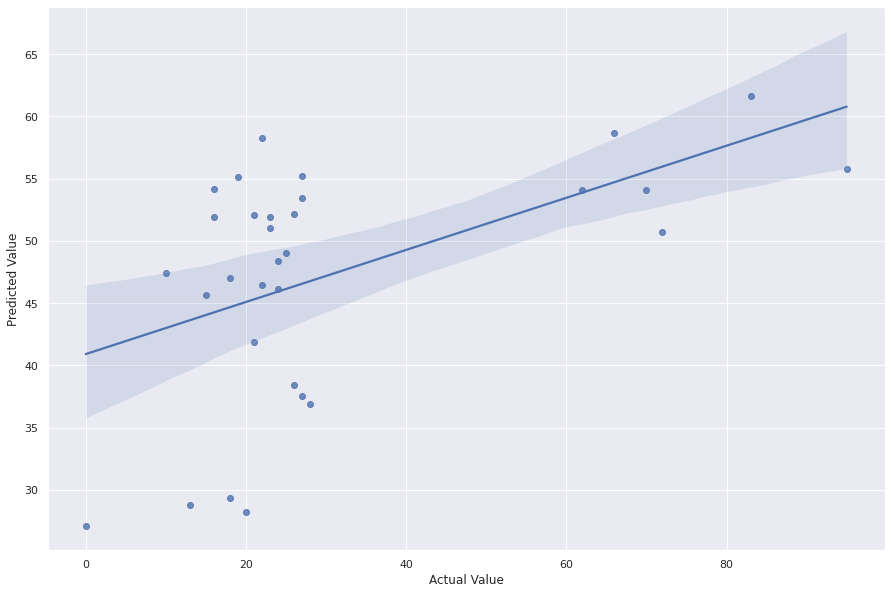

In [32]:
pred_y_df = pred_dataframe(y_test,y_pred_test)
reg_plot(pred_y_df,width=15,height=10)



---



###All Data

In [33]:
y_pred_all = regr.predict(X_new)
print("R2 score of Testing: ", R2_Score(y_new,y_pred_all))
print("Mean squared error: ",MS_error(y_new,y_pred_all))

R2 score of Testing:  0.2966680632677646
Mean squared error:  381.4649589437594


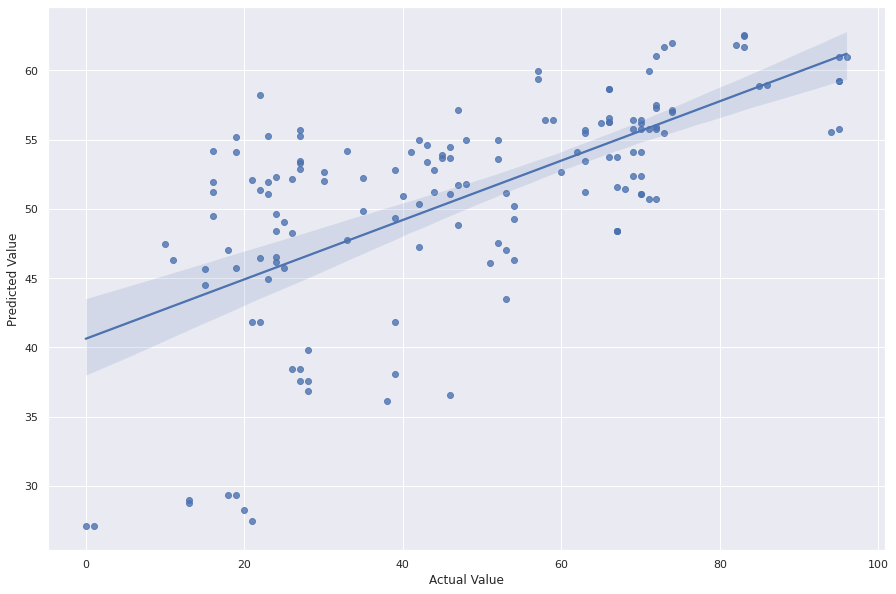

In [34]:
pred_y_df = pred_dataframe(y_new,y_pred_all)
reg_plot(pred_y_df,width=15,height=10)

#Ridge

[DOC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [35]:
from sklearn.linear_model import Ridge
regr = Ridge(alpha=1.0)
regr.fit(X_train, y_train)

Ridge()

###Training Results

In [36]:
y_pred_train = regr.predict(X_train)
print("R2 score of Training: ", R2_Score(y_train,y_pred_train))
print("Mean squared error: ",MS_error(y_train, y_pred_train))


R2 score of Training:  0.3077584075105947
Mean squared error:  318.88681018784916


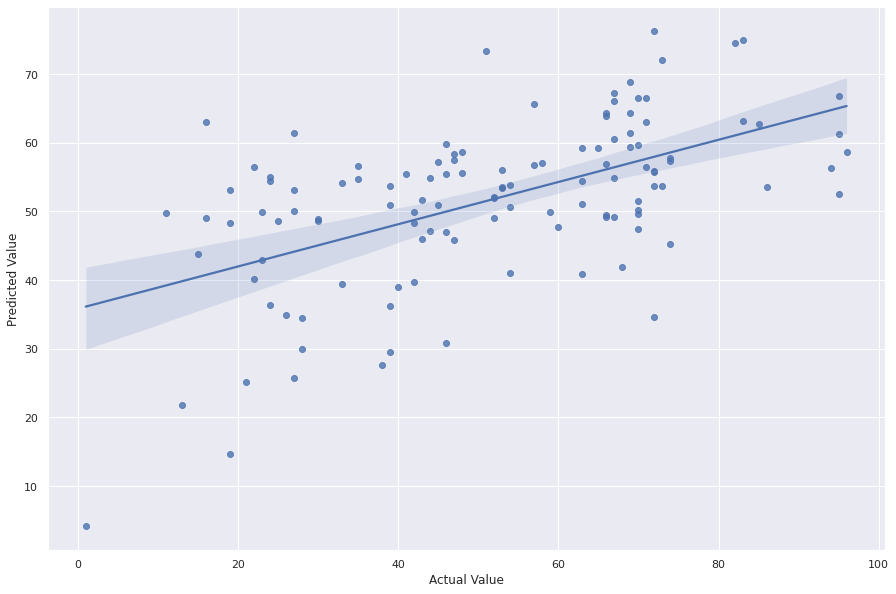

In [37]:
pred_y_df = pred_dataframe(y_train,y_pred_train)
reg_plot(pred_y_df,width=15,height=10)

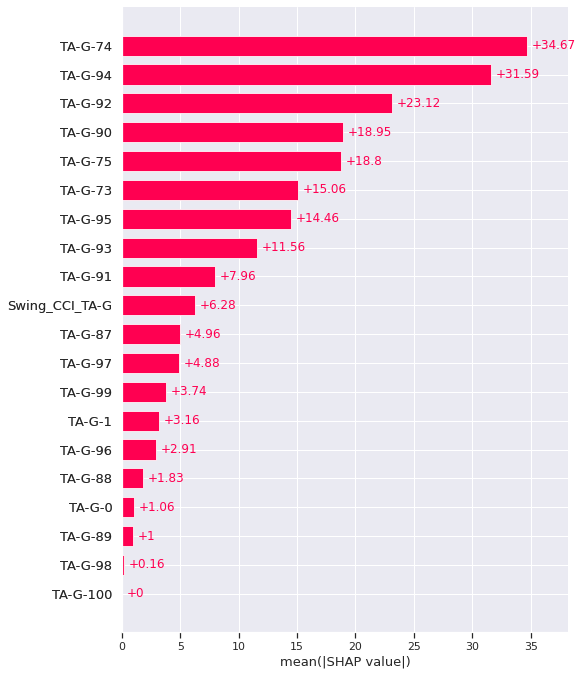

In [56]:
explain_shap(regr,X_train,20)



---



###Testing Results

In [38]:
y_pred_test = regr.predict(X_test)
print("R2 score of Testing: ", R2_Score(y_test,y_pred_test))
print("Mean squared error: ",MS_error(y_test,y_pred_test))

R2 score of Testing:  -2.007813420978097
Mean squared error:  1547.9441036557098


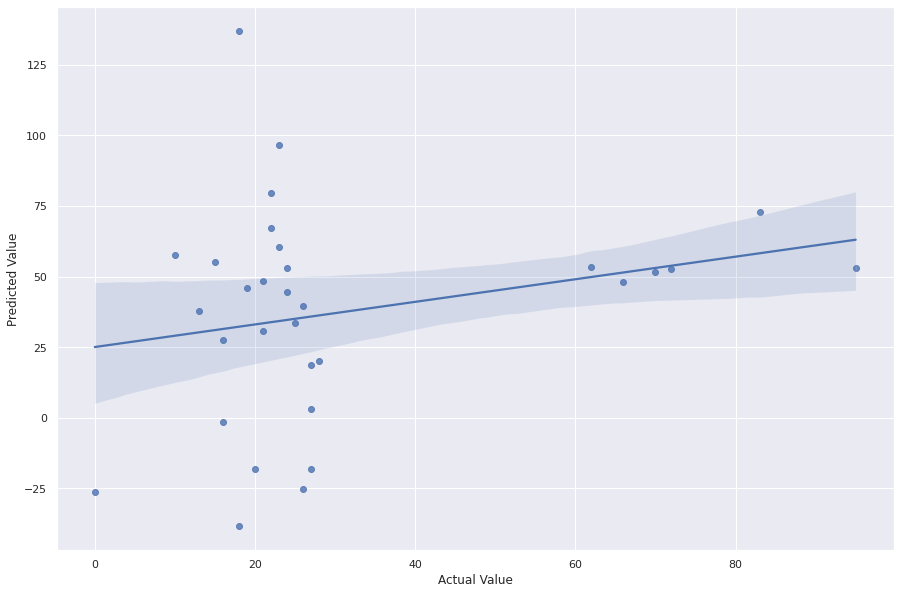

In [39]:
pred_y_df = pred_dataframe(y_test,y_pred_test)
reg_plot(pred_y_df,width=15,height=10)

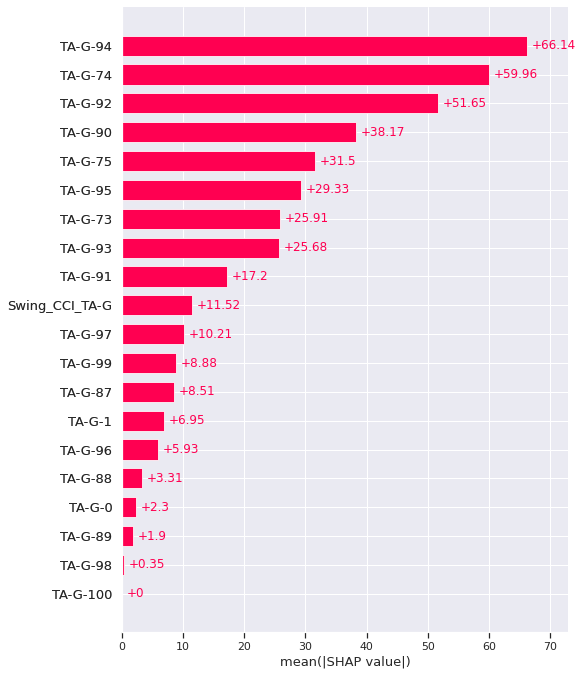

In [57]:
explain_shap(regr,X_test,20)



---



###All Data

In [40]:
y_pred_all = regr.predict(X_new)
print("R2 score of Testing: ", R2_Score(y_new,y_pred_all))
print("Mean squared error: ",MS_error(y_new,y_pred_all))

R2 score of Testing:  -0.05317698805132265
Mean squared error:  571.2098307011187


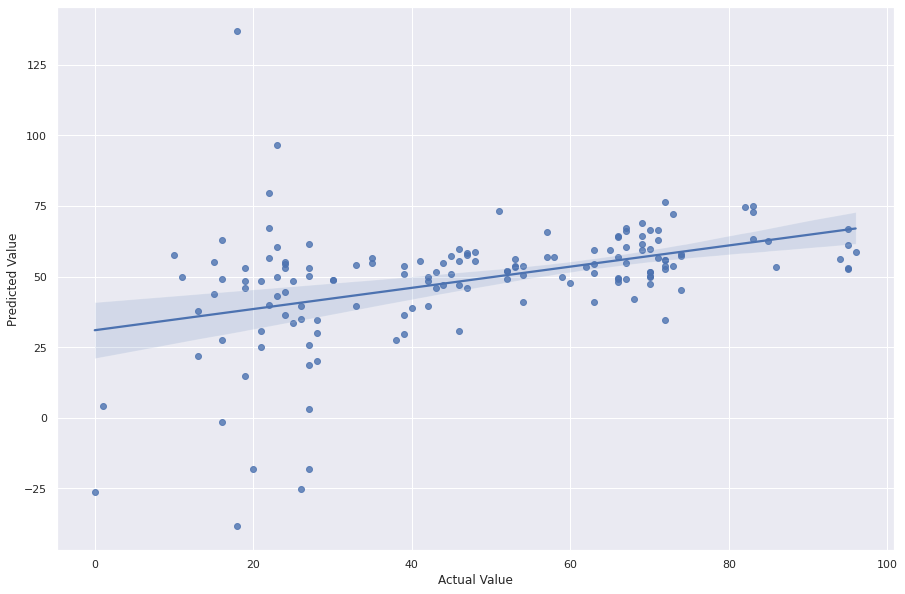

In [41]:
pred_y_df = pred_dataframe(y_new,y_pred_all)
reg_plot(pred_y_df,width=15,height=10)

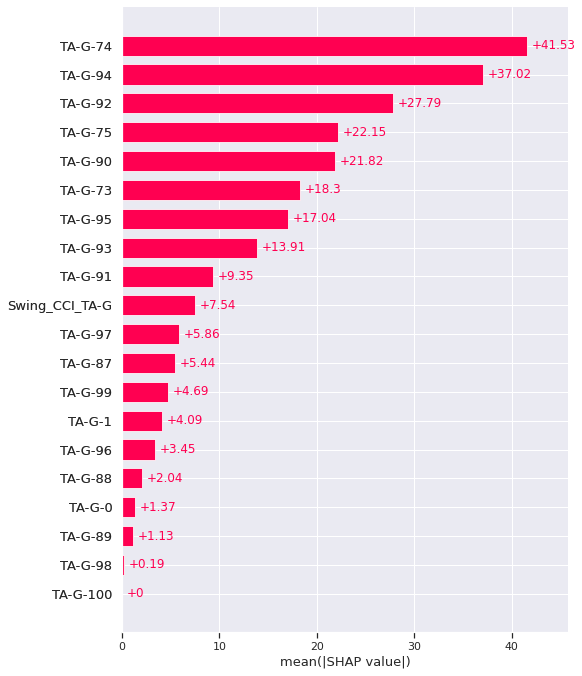

In [58]:
explain_shap(regr,X_new,20)



---



#Lasso

[DOC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [42]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.098e+04, tolerance: 5.528e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.1)

###Training Results

In [43]:
y_pred_train = regr.predict(X_train)
print("R2 score of Training: ", R2_Score(y_train,y_pred_train))
print("Mean squared error: ",MS_error(y_train, y_pred_train))


R2 score of Training:  0.2319725528685097
Mean squared error:  353.79819041460775


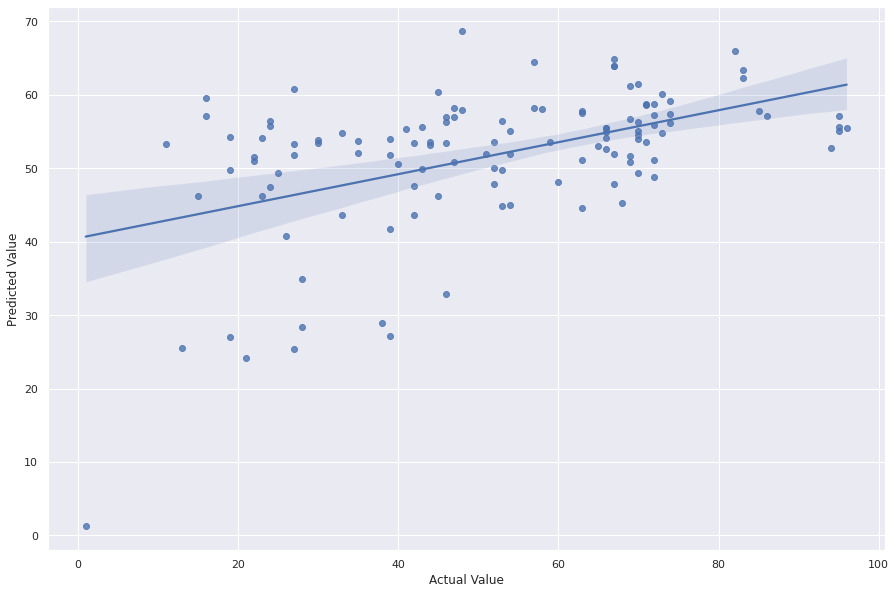

In [44]:
pred_y_df = pred_dataframe(y_train,y_pred_train)
reg_plot(pred_y_df,width=15,height=10)

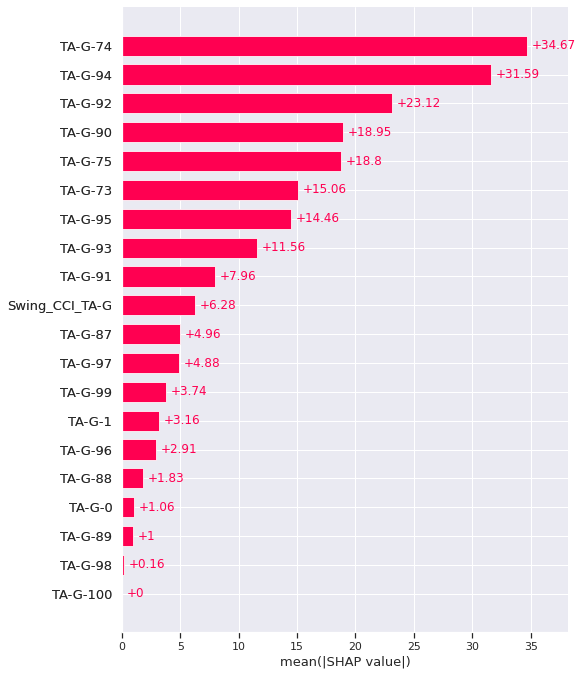

In [53]:
explain_shap(regr,X_train,20)



---



###Testing Results

In [45]:
y_pred_test = regr.predict(X_test)
print("R2 score of Testing: ", R2_Score(y_test,y_pred_test))
print("Mean squared error: ",MS_error(y_test,y_pred_test))

R2 score of Testing:  -0.5294522317805934
Mean squared error:  787.1188244242746


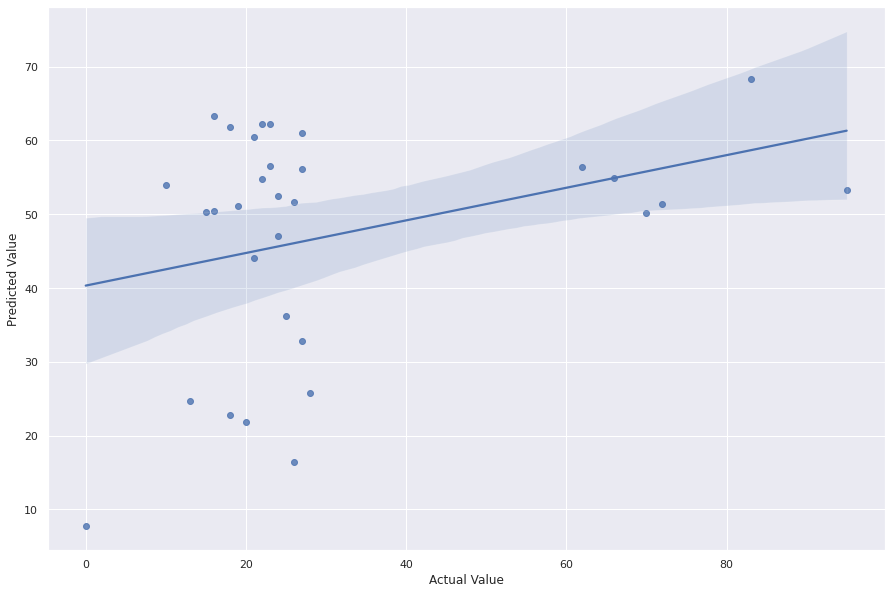

In [46]:
pred_y_df = pred_dataframe(y_test,y_pred_test)
reg_plot(pred_y_df,width=15,height=10)

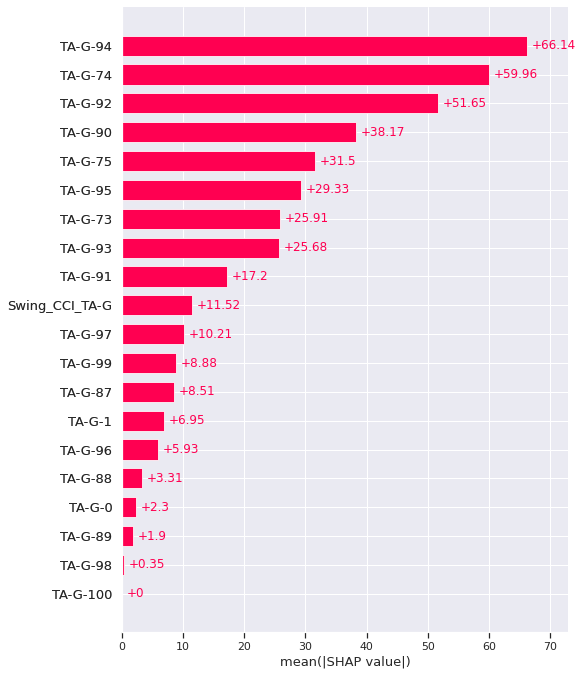

In [54]:
explain_shap(regr,X_test,20)



---



###All Data

In [47]:
y_pred_all = regr.predict(X_new)
print("R2 score of Testing: ", R2_Score(y_new,y_pred_all))
print("Mean squared error: ",MS_error(y_new,y_pred_all))

R2 score of Testing:  0.18365796516707822
Mean squared error:  442.7580556748705


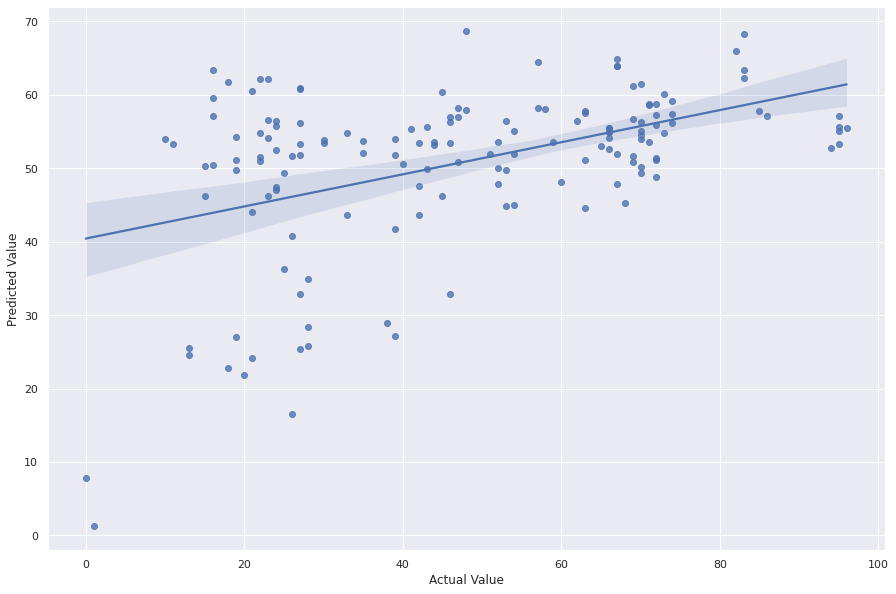

In [48]:
pred_y_df = pred_dataframe(y_new,y_pred_all)
reg_plot(pred_y_df,width=15,height=10)

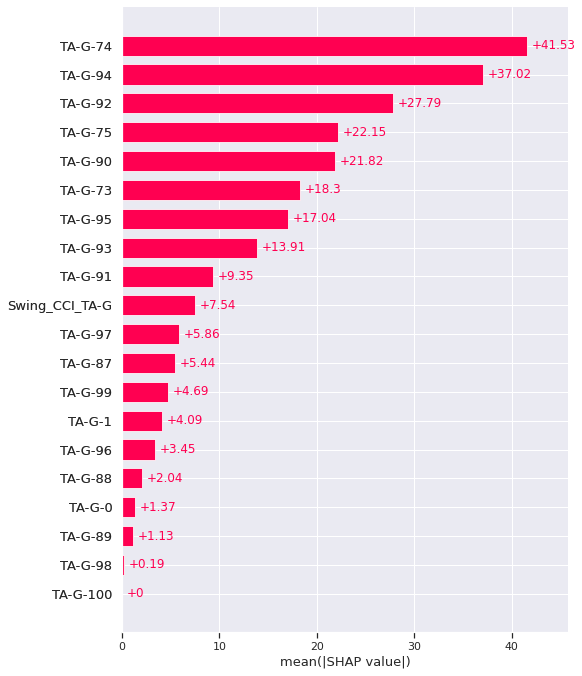

In [55]:
explain_shap(regr,X_new,20)